In [1]:
import os
from io import open 

"""Writing the data per file into a dictionary for which the key is the category of news"""

import unicodedata
import string

all_letters = string.ascii_letters + ".,;'& "
n_letters = len(all_letters)

def unitoAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

def readFile_byline(filename):
    line_of_news = open("news_data_final/"+filename , encoding = 'utf-8').read().split('\n')    
    return [unitoAscii(line) for line in line_of_news]

In [2]:
category_news = {}
all_categories = []

list_of_files = os.listdir("news_data_final/")

#Dictionary which maps every category of news to it's description
for _file in list_of_files:
    category = _file.split(".")[0]
    all_categories.append(category)
    news_descp = readFile_byline(_file)
    category_news[category] = news_descp

num_categories = len(all_categories)
print(num_categories)

count_of_news_category = {}
average_words_per_number_of_samples = []

#Counting news items per category of news 
for key in category_news.keys():
    item = category_news.get(key)
    number_of_news_items = len(item)
    count_of_news_category[key] = number_of_news_items
    count_of_words = 0
    for sentence in item:
        count_of_words += len(sentence.split(" "))
    average_words_per_number_of_samples.append(count_of_words/number_of_news_items)

#print(count_of_news_category["WELLNESS"])
#print(category_news["CRIME"][0:2])
#print(average_words_per_number_of_samples)

29


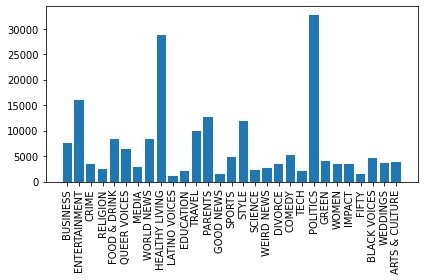

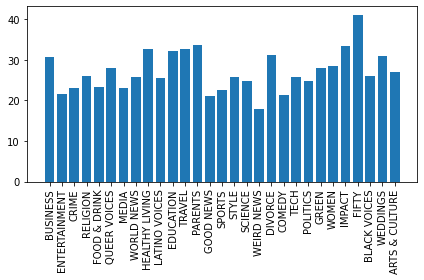

In [3]:
import random
import matplotlib
import matplotlib.pyplot as plt 

path = os.getcwd()
folder = "figs"
FILE = "Number_of_articles_per_category.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure()
category = count_of_news_category.keys()
value = count_of_news_category.values()
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(path_save)
plt.show()

path = os.getcwd()
folder = "figs"
FILE = "Words_per_category.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)



fig1 = plt.figure()
category = count_of_news_category.keys()
value = average_words_per_number_of_samples
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(path_save)
plt.show()

In [4]:
import torch
import torch.nn as nn 
from torch import optim
import torch.nn.functional as F 

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
print(device)

def findIndexOfWordInSentence(sentence):
    indexOfWord = {}
    for index, word in enumerate(sentence):
        indexOfWord[word] = index
    return list(indexOfWord.values())

def sentenceToTensor(sentence):
    indexes = findIndexOfWordInSentence(sentence)
    return torch.tensor(indexes , dtype = torch.long, device = device).view(-1, 1)

category_plus_news_list = []

from nltk.corpus import stopwords

for key in category_news.keys():
    for news_item in category_news[key]:
        #news_item = [word for word in news_item.split(" ") if word not in stopwords.words('english')]
        #news_item = " ".join(word for word in news_item)
        category_plus_news_list.append((key, news_item))

print(category_plus_news_list[0])

def pairedTensor(pair):
    #pair is element in category_plus_news_list
    input_tensor = sentenceToTensor(pair[1])
    output_tensor = sentenceToTensor(pair[0])
    return (input_tensor, output_tensor)

#print(pairedTensor(category_plus_news_list[100]))

unique_words = []

'''for pair in category_plus_news_list:
    for word in pair[1].split(" "):
        if word.lower() not in unique_words:
            unique_words.append(word.lower())

print(unique_words[0:50])'''

cuda:2
('BUSINESS', 'U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.')


'for pair in category_plus_news_list:\n    for word in pair[1].split(" "):\n        if word.lower() not in unique_words:\n            unique_words.append(word.lower())\n\nprint(unique_words[0:50])'

In [5]:
list_of_sentences_business = []
list_of_sentences_politics = []
list_of_sentences_religion = []
list_of_sentences_food = []
list_of_sentences_home = []

list_of_sentences = []

labels =[]
count_of_lables=[]

for pair in category_plus_news_list:
    label = pair[0]
    sentences = pair[1]
    
    if len(sentences.split(" ")) >= 5:
    
        list_of_sentences.append(sentences)
        labels.append(label)
    
#print(list_of_sentences[0:20])
print(len(list_of_sentences))
#print((labels[0:20]))



198123


In [6]:
label_list = list(category_news.keys())
index_class_map_dict1={}

for idx, value in enumerate(label_list):
    index_class_map_dict1[value]=idx

print(index_class_map_dict1)
label_values = list(index_class_map_dict1.values())

{'BUSINESS': 0, 'ENTERTAINMENT': 1, 'CRIME': 2, 'RELIGION': 3, 'FOOD & DRINK': 4, 'QUEER VOICES': 5, 'MEDIA': 6, 'WORLD NEWS': 7, 'HEALTHY LIVING': 8, 'LATINO VOICES': 9, 'EDUCATION': 10, 'TRAVEL': 11, 'PARENTS': 12, 'GOOD NEWS': 13, 'SPORTS': 14, 'STYLE': 15, 'SCIENCE': 16, 'WEIRD NEWS': 17, 'DIVORCE': 18, 'COMEDY': 19, 'TECH': 20, 'POLITICS': 21, 'GREEN': 22, 'WOMEN': 23, 'IMPACT': 24, 'FIFTY': 25, 'BLACK VOICES': 26, 'WEDDINGS': 27, 'ARTS & CULTURE': 28}


In [7]:
number_labels=[]

for label in labels:
    number_labels.append(index_class_map_dict1[label])

In [8]:
import torch
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

import random
random.seed(0)

In [9]:
from sklearn.model_selection import train_test_split

train_texts = list_of_sentences
train_labels = number_labels

train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2)


print(len(train_texts))
print(len(train_labels))
print(len(val_texts))

158498
158498
39625


In [10]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, return_tensors='pt', truncation=True, padding=True)
val_encodings = tokenizer(val_texts, return_tensors='pt', truncation=True, padding=True)
print(train_encodings.keys())

dict_keys(['input_ids', 'attention_mask'])


In [11]:
class newsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: (val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = newsDataset(train_encodings, train_labels)
#print((train_dataset).__getitem__(3))
val_dataset = newsDataset(val_encodings, val_labels)


In [12]:
from sklearn.metrics import f1_score
import numpy as np

y_pred = np.array([ 4, 13,  6, 13,  5,  2,  2,  6,  6,  6,  2,  6,  6,  2,  2,  6])
y_true = np.array([27, 21,  4, 21,  8, 12,  0,  8,  8, 6,  7,  8, 21, 12, 21, 11])

print(f1_score(y_true, y_pred, average="macro"))


0.020833333333333332


In [13]:
from torch.utils.data import DataLoader
from transformers import DistilBertModel, DistilBertConfig
from transformers.modeling_outputs import SequenceClassifierOutput
from transformers import DistilBertForSequenceClassification, AdamW
from torch.nn import functional as F
import torch.nn
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

device = torch.device('cuda:2') if torch.cuda.is_available() else torch.device('cpu')


class ModDistilBertForSequenceClassification(DistilBertForSequenceClassification):
    
    """Inherited to include a way to output intermediate preclassified output"""
    
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels

        self.distilbert = DistilBertModel(config)
        self.pre_classifier = nn.Linear(config.dim, config.dim)
        self.classifier = nn.Linear(config.dim, config.num_labels)
        self.dropout = nn.Dropout(config.seq_classif_dropout) #Original config.seq_classif_dropout, hardcoded for eval

        self.init_weights()

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
    ):
        r"""
        labels (:obj:`torch.LongTensor` of shape :obj:`(batch_size,)`, `optional`):
            Labels for computing the sequence classification/regression loss. Indices should be in :obj:`[0, ...,
            config.num_labels - 1]`. If :obj:`config.num_labels == 1` a regression loss is computed (Mean-Square loss),
            If :obj:`config.num_labels > 1` a classification loss is computed (Cross-Entropy).
        """
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        distilbert_output = self.distilbert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        hidden_state = distilbert_output[0]  # (bs, seq_len, dim)
        pooled_output = hidden_state[:, 0]  # (bs, dim)
        pooled_output = self.pre_classifier(pooled_output)  # (bs, dim)
        pooled_output1 = nn.ReLU()(pooled_output)  # (bs, dim)
        pooled_output1 = self.dropout(pooled_output1)  # (bs, dim)
        logits = self.classifier(pooled_output1)  # (bs, num_labels)

        loss = None
        if labels is not None:
            if self.num_labels == 1:
                loss_fct = nn.MSELoss()
                loss = loss_fct(logits.view(-1), labels.view(-1))
            else:
                loss_fct = nn.CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        if not return_dict:
            output = (logits,) + distilbert_output[1:]
            return ((loss,) + output) if loss is not None else output

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=distilbert_output.hidden_states,
            attentions=distilbert_output.attentions,
        ),pooled_output






In [14]:
model = ModDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels = 29)
model.to(device)

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0001}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

num_of_items_per_class = [7526, 15920, 3361, 2438, 8262, 6137, 2730, 8253, 28464, 1123, 2107, 9826, 12605, 1362, 4693, 11830, 2109, 2611, 3421, 5008, 2078, 32241, 3854, 3459, 3404, 1376, 4463, 3641, 3821]
weights = []
for i in num_of_items_per_class:
    weights.append(1/i)
    
class_weights = torch.FloatTensor(weights).to(device)

train_losses = []
train_acc = []
val_losses = []
val_acc = []
running_loss = 0
running_acc = 0

'''path = os.getcwd()

folder = "bert_model1"
FILE = "model1.pth"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

checkpoint = torch.load(path_save)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']'''

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing ModDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing ModDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ModDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ModDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bi

'path = os.getcwd()\n\nfolder = "bert_model1"\nFILE = "model1.pth"\n\npath_save = os.path.join(path, folder)\npath_save = os.path.join(path_save, FILE)\n\ncheckpoint = torch.load(path_save)\nmodel.load_state_dict(checkpoint[\'model_state_dict\'])\noptimizer.load_state_dict(checkpoint[\'optimizer_state_dict\'])\nepoch = checkpoint[\'epoch\']\nloss = checkpoint[\'loss\']'

In [15]:
train_f1_score_macro = []
train_f1_score_raw = []


val_f1_score_macro = []
val_f1_score_raw = []


for epoch in tqdm(range(9)):
    
    model.train()
    
    pred_temp = 0
    true_temp = 0
    y_true = []
    y_pred = []
    
    
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs, feat_for_tsne = model(input_ids, attention_mask=attention_mask)
        loss = F.cross_entropy(outputs.logits, labels, class_weights)
        accuracy = (outputs.logits.argmax(-1) == labels).float().sum()
        
        running_acc += accuracy.item()
        running_loss += loss.item()
        
        #predictions for f1 score
        pred_temp = outputs.logits.argmax(-1).cpu().detach().numpy()
        true_temp = labels.cpu().detach().numpy()


        for item in pred_temp:
            y_pred.append(item)

        for item in true_temp:
            y_true.append(item)

        loss.backward()
        optimizer.step()
        
            
    
    print("train_loss for epoch = {epoch}".format(epoch = epoch + 1 ), "is", running_loss/len(train_loader))
    train_losses.append(running_loss/len(train_loader))
    running_loss = 0
    
    print("train_acc for epoch = {epoch}".format(epoch = epoch + 1), "is", running_acc/len(train_texts))
    train_acc.append(running_acc/len(train_texts))
    running_acc = 0
    
    f1score = f1_score(y_true, y_pred, average="macro")
    f1score_none = f1_score(y_true, y_pred, average=None)
    
    print("train_F1 macro score for epoch = {epoch}".format(epoch = epoch + 1), "is", f1score)
    print("F1 raw score for epoch = {epoch}".format(epoch = epoch + 1), "is", f1score_none)
    
    train_f1_score_macro.append(f1score)
    train_f1_score_raw.append(f1score_none)
    
    pred_temp = 0
    true_temp = 0
    y_true = []
    y_pred = []
    
    if epoch%1 == 0: 
        model.eval()
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs, feat_for_tsne = model(input_ids, attention_mask=attention_mask)
            loss = F.cross_entropy(outputs.logits, labels, class_weights)
            running_loss += loss.item()
            accuracy = (outputs.logits.argmax(-1) == labels).float().sum()
            running_acc += accuracy.item()
            
            #predictions for f1 score
            pred_temp = outputs.logits.argmax(-1).cpu().detach().numpy()
            true_temp = labels.cpu().detach().numpy()
            
            
            for item in pred_temp:
                y_pred.append(item)
            
            for item in true_temp:
                y_true.append(item)
                
                         
            
    print("val_loss for epoch = {epoch}".format(epoch = epoch + 1), "is", running_loss/len(val_loader))
    val_losses.append(running_loss/len(val_loader))
    running_loss = 0
    print("val_acc for epoch = {epoch}".format(epoch = epoch + 1), "is", running_acc/len(val_texts))
    val_acc.append(running_acc/len(val_texts))
    running_acc = 0
    
    f1score = f1_score(y_true, y_pred, average="macro")
    f1score_none = f1_score(y_true, y_pred, average=None)
    
    print("F1 macro score for epoch = {epoch}".format(epoch = epoch + 1), "is", f1score)
    print("F1 raw score for epoch = {epoch}".format(epoch = epoch + 1), "is", f1score_none)
    
    val_f1_score_macro.append(f1score)
    val_f1_score_raw.append(f1score_none)
                                

  0%|          | 0/9 [00:00<?, ?it/s]

train_loss for epoch = 1 is 1.5081532322335847
train_acc for epoch = 1 is 0.6089098916074651
train_F1 macro score for epoch = 1 is 0.53202843933683
F1 raw score for epoch = 1 is [0.53681479 0.63729019 0.54847727 0.52172249 0.7669235  0.68988102
 0.44218415 0.69327824 0.64959212 0.24013556 0.47056305 0.74548251
 0.67457787 0.2418861  0.7053093  0.74921696 0.49490143 0.35579632
 0.69596443 0.40209874 0.47993132 0.69091507 0.51593489 0.34796044
 0.31293788 0.18901504 0.39125623 0.74230044 0.49647741]


 11%|█         | 1/9 [45:41<6:05:34, 2741.86s/it]

val_loss for epoch = 1 is 1.1764192602111776
val_acc for epoch = 1 is 0.6601640378548896
F1 macro score for epoch = 1 is 0.5926869074492986
F1 raw score for epoch = 1 is [0.57833089 0.66979092 0.6216545  0.55079365 0.79476697 0.7323818
 0.55010366 0.70902613 0.70427604 0.42292994 0.5026455  0.79288803
 0.72911079 0.3929471  0.74015009 0.80996068 0.53577982 0.44444444
 0.7729805  0.4690881  0.50166667 0.73265157 0.56221198 0.36809816
 0.38658537 0.27359307 0.47518973 0.7617896  0.60208461]
train_loss for epoch = 2 is 1.0350385673823193
train_acc for epoch = 2 is 0.6892200532498832
train_F1 macro score for epoch = 2 is 0.6309571670310119
F1 raw score for epoch = 2 is [0.62587927 0.70498627 0.64159223 0.59973123 0.82687781 0.74465227
 0.55882866 0.74748078 0.72728205 0.50224551 0.5694256  0.82716365
 0.74515293 0.43370068 0.78567901 0.82697474 0.59400418 0.48122509
 0.77504662 0.52342857 0.58723784 0.73269177 0.6103453  0.42476852
 0.41669224 0.33744222 0.52327565 0.81498008 0.60896708]


 22%|██▏       | 2/9 [1:31:17<5:19:26, 2738.12s/it]

val_loss for epoch = 2 is 1.1413601337028552
val_acc for epoch = 2 is 0.6757602523659306
F1 macro score for epoch = 2 is 0.6082066959015822
F1 raw score for epoch = 2 is [0.596875   0.72145805 0.63157895 0.55656482 0.81332214 0.74864865
 0.54592834 0.71415356 0.72425181 0.47432024 0.5154265  0.81440162
 0.73454246 0.38529785 0.76092293 0.81978022 0.45072364 0.45974955
 0.80904131 0.49769585 0.50334448 0.73574561 0.52857796 0.39972433
 0.39667458 0.37336815 0.50156348 0.80390879 0.62040332]
train_loss for epoch = 3 is 0.8125362592743939
train_acc for epoch = 3 is 0.7348231523426163
train_F1 macro score for epoch = 3 is 0.6917789954620276
F1 raw score for epoch = 3 is [0.67544987 0.74979219 0.69931627 0.6732     0.85533597 0.77259327
 0.62506648 0.77803305 0.76001819 0.59959759 0.64270613 0.8606693
 0.77588074 0.54821235 0.83859649 0.86140999 0.67949632 0.60413153
 0.82150833 0.57791538 0.65865496 0.74978576 0.67955267 0.50064813
 0.49676425 0.45138122 0.5958379  0.84905053 0.68098602]


 33%|███▎      | 3/9 [2:16:57<4:33:53, 2738.89s/it]

val_loss for epoch = 3 is 1.137637185344159
val_acc for epoch = 3 is 0.6850473186119874
F1 macro score for epoch = 3 is 0.6184350116830992
F1 raw score for epoch = 3 is [0.60081275 0.74360228 0.62251656 0.59481038 0.82205799 0.75600175
 0.52539185 0.71319149 0.73182485 0.46676096 0.55474453 0.82632541
 0.74263862 0.37619048 0.77261614 0.83011499 0.57464213 0.46444644
 0.77018634 0.50656501 0.54460967 0.72740837 0.58457998 0.3900197
 0.39559014 0.35226179 0.53333333 0.79448457 0.61688685]
train_loss for epoch = 4 is 0.6266796578703638
train_acc for epoch = 4 is 0.7745712879657788
train_F1 macro score for epoch = 4 is 0.7451300525137384
F1 raw score for epoch = 4 is [0.72328898 0.78495786 0.76476346 0.72981303 0.87818984 0.80100503
 0.68995793 0.80478264 0.78565554 0.65413534 0.6973494  0.88683193
 0.80170073 0.66364666 0.87114384 0.87966983 0.7456446  0.70631172
 0.85033661 0.63631241 0.74790331 0.77291091 0.74075108 0.56206156
 0.5748393  0.55816794 0.67455766 0.8759852  0.7460972 ]


 44%|████▍     | 4/9 [3:02:38<3:48:19, 2739.81s/it]

val_loss for epoch = 4 is 1.2226501130873053
val_acc for epoch = 4 is 0.6900694006309148
F1 macro score for epoch = 4 is 0.619879495759881
F1 raw score for epoch = 4 is [0.60450607 0.74225757 0.63686382 0.59459459 0.81972603 0.74619498
 0.54899329 0.71993027 0.73758571 0.4727955  0.54124748 0.83117543
 0.7354022  0.34977578 0.76915472 0.82928906 0.57255676 0.45894737
 0.76954733 0.54639661 0.51079137 0.75304081 0.58766626 0.38249595
 0.39571046 0.35876289 0.5429815  0.80102696 0.61708861]
train_loss for epoch = 5 is 0.47317073591915715
train_acc for epoch = 5 is 0.8119660815909349
train_F1 macro score for epoch = 5 is 0.7959567835075378
F1 raw score for epoch = 5 is [0.76873324 0.81864623 0.80898502 0.79488273 0.89925428 0.83250939
 0.73790776 0.82994292 0.81108164 0.73791574 0.75440775 0.91128828
 0.83064149 0.76142132 0.90285274 0.89686099 0.81521184 0.80669309
 0.87940309 0.69462707 0.81272265 0.79487122 0.79293145 0.62677572
 0.64930991 0.67003027 0.72314303 0.91128113 0.80841473]


 56%|█████▌    | 5/9 [3:48:19<3:02:41, 2740.44s/it]

val_loss for epoch = 5 is 1.3329512611855698
val_acc for epoch = 5 is 0.6913312302839116
F1 macro score for epoch = 5 is 0.6211896884982653
F1 raw score for epoch = 5 is [0.59890444 0.73198462 0.63067808 0.59674134 0.8258427  0.7464539
 0.55516014 0.71846981 0.74740484 0.45697329 0.52890792 0.82161595
 0.74132492 0.39451115 0.74656189 0.83404255 0.59569892 0.4730369
 0.7997076  0.52608311 0.53169734 0.75936497 0.58373206 0.35508346
 0.38533114 0.37931034 0.52522101 0.81461794 0.61003861]
train_loss for epoch = 6 is 0.35228533342082446
train_acc for epoch = 6 is 0.8454112985652816
train_F1 macro score for epoch = 6 is 0.8393382860875347
F1 raw score for epoch = 6 is [0.80883629 0.84710136 0.85665876 0.83140171 0.91922739 0.86290244
 0.78371599 0.85346145 0.83620961 0.80642115 0.81733746 0.92739959
 0.85644061 0.83306056 0.92520346 0.91848144 0.86379265 0.87340619
 0.91149826 0.75087088 0.86930905 0.818715   0.84201389 0.70131793
 0.71356147 0.75316227 0.77189055 0.93206119 0.85535168]


 67%|██████▋   | 6/9 [4:33:56<2:16:56, 2738.96s/it]

val_loss for epoch = 6 is 1.4599513586672217
val_acc for epoch = 6 is 0.696
F1 macro score for epoch = 6 is 0.6216962265944125
F1 raw score for epoch = 6 is [0.62064252 0.73607427 0.64053156 0.54942966 0.83725029 0.72691397
 0.58870326 0.71842475 0.76828794 0.4057971  0.49597135 0.82835627
 0.74036281 0.40766551 0.75266731 0.83256976 0.57282502 0.48689139
 0.78753541 0.51336898 0.56422018 0.74432897 0.56178161 0.36699129
 0.39571429 0.41421947 0.52116548 0.82688391 0.62361624]
train_loss for epoch = 7 is 0.26756646294849756
train_acc for epoch = 7 is 0.8703390579060934
train_F1 macro score for epoch = 7 is 0.8694065667156072
F1 raw score for epoch = 7 is [0.84145861 0.87226429 0.88454215 0.86550492 0.93445403 0.88786962
 0.80820028 0.872492   0.8581584  0.82498808 0.85361367 0.94069504
 0.87682132 0.88040712 0.94450234 0.92961332 0.89634641 0.91014091
 0.92691436 0.80068182 0.8916644  0.83671907 0.86879018 0.75658492
 0.76992578 0.81920248 0.81812508 0.95006614 0.89204368]


 78%|███████▊  | 7/9 [5:19:31<1:31:15, 2737.84s/it]

val_loss for epoch = 7 is 1.5935387578978983
val_acc for epoch = 7 is 0.705615141955836
F1 macro score for epoch = 7 is 0.625210489993065
F1 raw score for epoch = 7 is [0.61295626 0.75040943 0.61919505 0.55141037 0.81965351 0.7549225
 0.56272661 0.71689751 0.76326053 0.49392713 0.53934942 0.82060302
 0.74021352 0.36065574 0.75987842 0.83788546 0.5751503  0.44609053
 0.8126935  0.50439147 0.55503513 0.78828452 0.57245941 0.39736842
 0.39096683 0.37897311 0.531351   0.83638928 0.63800623]
train_loss for epoch = 8 is 0.20746437280885466
train_acc for epoch = 8 is 0.8914181882421229
train_F1 macro score for epoch = 8 is 0.8936919630596047
F1 raw score for epoch = 8 is [0.86483924 0.89541194 0.90902717 0.89319945 0.94206214 0.90515222
 0.8344318  0.88980896 0.87554194 0.86796213 0.88435739 0.95169113
 0.8975832  0.90783807 0.95652174 0.94188952 0.91023536 0.93501636
 0.94482637 0.839765   0.91270718 0.85753649 0.89328181 0.79702048
 0.83047746 0.85622747 0.85235921 0.95450786 0.91578782]


 89%|████████▉ | 8/9 [6:05:12<45:38, 2738.84s/it]  

val_loss for epoch = 8 is 1.744079087743198
val_acc for epoch = 8 is 0.7010473186119874
F1 macro score for epoch = 8 is 0.6268064195837217
F1 raw score for epoch = 8 is [0.59485628 0.74205967 0.64217487 0.56886228 0.83497463 0.73274478
 0.58899676 0.72011923 0.76293905 0.47135843 0.54345435 0.82130851
 0.74231951 0.37113402 0.74959786 0.83176199 0.62543757 0.4822566
 0.78796562 0.51962947 0.55097614 0.76704301 0.5825603  0.38693777
 0.40709046 0.40348331 0.51671733 0.81496326 0.61366313]
train_loss for epoch = 9 is 0.16563178545862267
train_acc for epoch = 9 is 0.908074549836591
train_F1 macro score for epoch = 9 is 0.910992385513558
F1 raw score for epoch = 9 is [0.8868419  0.91442762 0.92606449 0.9107018  0.95310991 0.92400741
 0.85113269 0.90281311 0.89128759 0.88685946 0.90739726 0.95934959
 0.90697445 0.92167102 0.9609334  0.95139959 0.92996109 0.93881364
 0.95698354 0.86725664 0.92557359 0.87731948 0.9115177  0.84844601
 0.85898305 0.86701911 0.8771527  0.96758021 0.93720115]


100%|██████████| 9/9 [6:50:59<00:00, 2739.94s/it]

val_loss for epoch = 9 is 1.8901929697562325
val_acc for epoch = 9 is 0.707205047318612
F1 macro score for epoch = 9 is 0.6303663001754987
F1 raw score for epoch = 9 is [0.61704918 0.75186335 0.63006177 0.59852476 0.8322693  0.76395939
 0.58146487 0.71978352 0.77226011 0.46029173 0.54525627 0.82259714
 0.74277017 0.37407407 0.76101861 0.83447391 0.59584296 0.45462403
 0.8133829  0.49728892 0.58481013 0.77213879 0.59961315 0.38018433
 0.37969095 0.43214286 0.51831602 0.82430647 0.62056304]


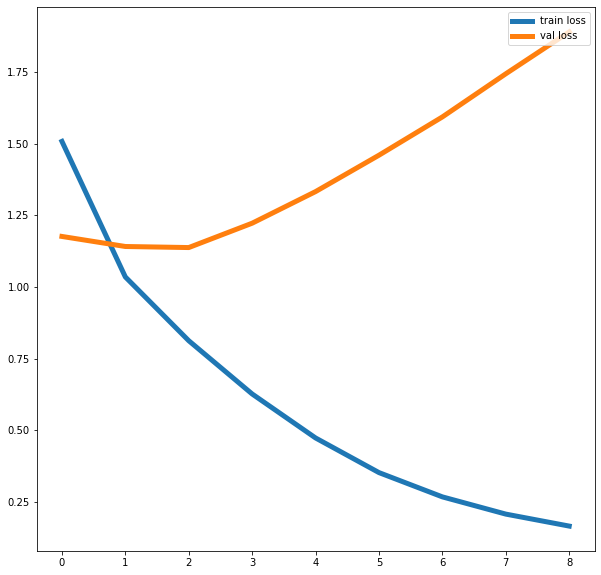

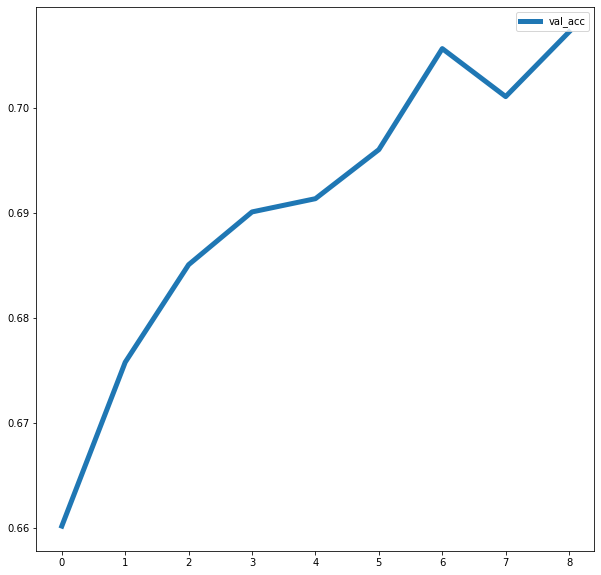

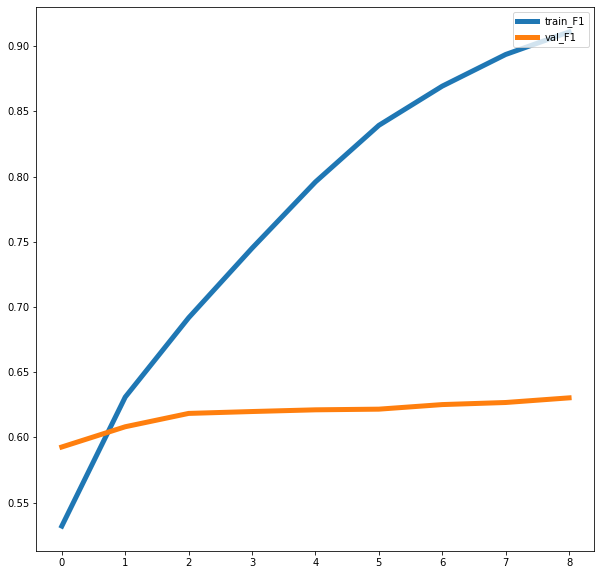

In [17]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np

epochs =[]

for i in range(9):
    epochs.append(i)

plt.figure(figsize=(10,10))
plt.plot(epochs, train_losses, linewidth=5)
plt.plot(epochs, val_losses, linewidth=5)
plt.legend(['train loss', 'val loss'], loc = 'upper right')

path = os.getcwd()
folder = "figs"
FILE = "loss-bert.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

#plt.savefig(path_save)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(epochs, val_acc, linewidth =5)
plt.legend(['val_acc'], loc = 'upper right')

path = os.getcwd()
folder = "figs"
FILE = "acc-bert.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

#plt.savefig(path_save)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(epochs, train_f1_score_macro, linewidth =5)
plt.plot(epochs, val_f1_score_macro, linewidth =5)
plt.legend(['train_F1','val_F1'], loc = 'upper right')

path = os.getcwd()
folder = "figs"
FILE = "F1-bert.png"

#plt.savefig(path_save)
plt.show()


f = open("values1.txt",'w')
for i in range(len(epochs)):
    
    f.write("train_loss for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_losses[i]) + "\n")
    f.write("train_acc for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_acc[i]) + "\n")
    f.write("val_loss for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_losses[i]) + "\n")
    f.write("val_acc for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_acc[i]) + "\n")
    f.write("Training F1 macro score for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_f1_score_macro[i]) + "\n")
    f.write("Training F1 macro raw for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_f1_score_raw[i]) + "\n")
    f.write("Validation F1 macro score for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_f1_score_macro[i]) + "\n")
    f.write("Validation F1 macro raw for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_f1_score_raw[i]) + "\n")
    f.write("\n""\n")
f.close()

In [ ]:
'''import os
import shutil

path = os.getcwd()

shutil.rmtree("bert_model1")
os.mkdir("bert_model1")

folder = "bert_model1"
FILE = "model1.pth"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss
            }, path_save)'''

In [19]:

f1_score_macro = []
f1_score_raw = []
pre_outputs_states = []

pred_temp = 0
true_temp = 0
y_true = []
y_pred = []
epoch = 10

all_actual_targets = []
all_top_three_preds = []

model.eval()

for idx, batch in enumerate(val_loader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    outputs, feat_for_tsne = model(input_ids, attention_mask=attention_mask)
    loss = F.cross_entropy(outputs.logits, labels, class_weights)
    running_loss += loss.item()
    
    # Top three predictions for MRR calculation
    values, indices = torch.topk(outputs.logits , 3)
    
    top_three_preds = indices.cpu().detach().numpy()
    actual_targets = labels.cpu().detach().numpy()
    
    for item1 in top_three_preds:
        all_top_three_preds.append(item1)
        
    for item2 in actual_targets:
        all_actual_targets.append(item2)
    
    accuracy = (outputs.logits.argmax(-1) == labels).float().sum()
    running_acc += accuracy.item()

    # predictions for f1 score
    pred_temp = outputs.logits.argmax(-1).cpu().detach().numpy()
    true_temp = labels.cpu().detach().numpy()
        
    for item in pred_temp:
        y_pred.append(item)

    for item in true_temp:
        y_true.append(item)
                

In [20]:
ranks = [] 

for value in range(len(all_actual_targets)):
    if all_actual_targets[value] == all_top_three_preds[value][0]:
        ranks.append(1)
    elif all_actual_targets[value] == all_top_three_preds[value][1]:
        ranks.append(2)
    elif all_actual_targets[value] == all_top_three_preds[value][2]:
        ranks.append(3)
    else:
        ranks.append(0)

def meanReciprocalRank(arrayOfRanks):
    _sum = 0
    for i in arrayOfRanks:
        
        if i != 0:
            _sum += 1/i
        else:
            _sum += i
            
    return _sum/len(arrayOfRanks)


def accuracy(predicted, target):
    count = 0
    for i in range(len(predicted)):
        
        if predicted[i][0] == target[i]:
            count +=1
            
    return count/len(predicted)


def accuracyTop3(predicted, target):
    count = 0
    for i in range(len(predicted)):
        
        if predicted[i][0] == target[i] or predicted[i][1] == target[i] or predicted[i][2] == target[i]:
            count +=1
            
    return count/len(predicted)
        

In [21]:
print("val_loss for epoch = {epoch}".format(epoch = epoch), "is", running_loss/len(val_loader))
val_losses.append(running_loss/len(val_loader))
running_loss = 0
print("val_acc for epoch = {epoch}".format(epoch = epoch), "is", running_acc/len(val_texts))
val_acc.append(running_acc/len(val_texts))
running_acc = 0



print("Accuracy for top prediction is :", accuracy(all_top_three_preds, all_actual_targets))
print("Accuracy for top 3 predictions is :", accuracyTop3(all_top_three_preds, all_actual_targets))
print("Mean Reciprocal Rank for top 3 predictions is :" , meanReciprocalRank(ranks))


f1score = f1_score(y_true, y_pred, average="macro")
f1score_none = f1_score(y_true, y_pred, average=None)

print("F1 macro score for epoch = {epoch}".format(epoch = epoch), "is", f1score)
print("F1 raw score for epoch = {epoch}".format(epoch = epoch), "is", f1score_none)

f1_score_macro.append(f1score)
f1_score_raw.append(f1score_none)

val_loss for epoch = 10 is 1.9757187554855644
val_acc for epoch = 10 is 0.7085930599369085
Accuracy for top prediction is : 0.7085930599369085
Accuracy for top 3 predictions is : 0.8934511041009464
Mean Reciprocal Rank for top 3 predictions is : 0.7930136698212195
F1 macro score for epoch = 10 is 0.6273271130478182
F1 raw score for epoch = 10 is [0.60509338 0.74304207 0.64361327 0.59041394 0.83422143 0.72908367
 0.57680723 0.71252508 0.77951292 0.48192771 0.53958333 0.82189668
 0.73771152 0.38745387 0.75774505 0.83548046 0.58450704 0.42983317
 0.7773949  0.52788462 0.56853933 0.78538888 0.57373989 0.38143582
 0.40377804 0.43966942 0.52919516 0.81388479 0.6011236 ]


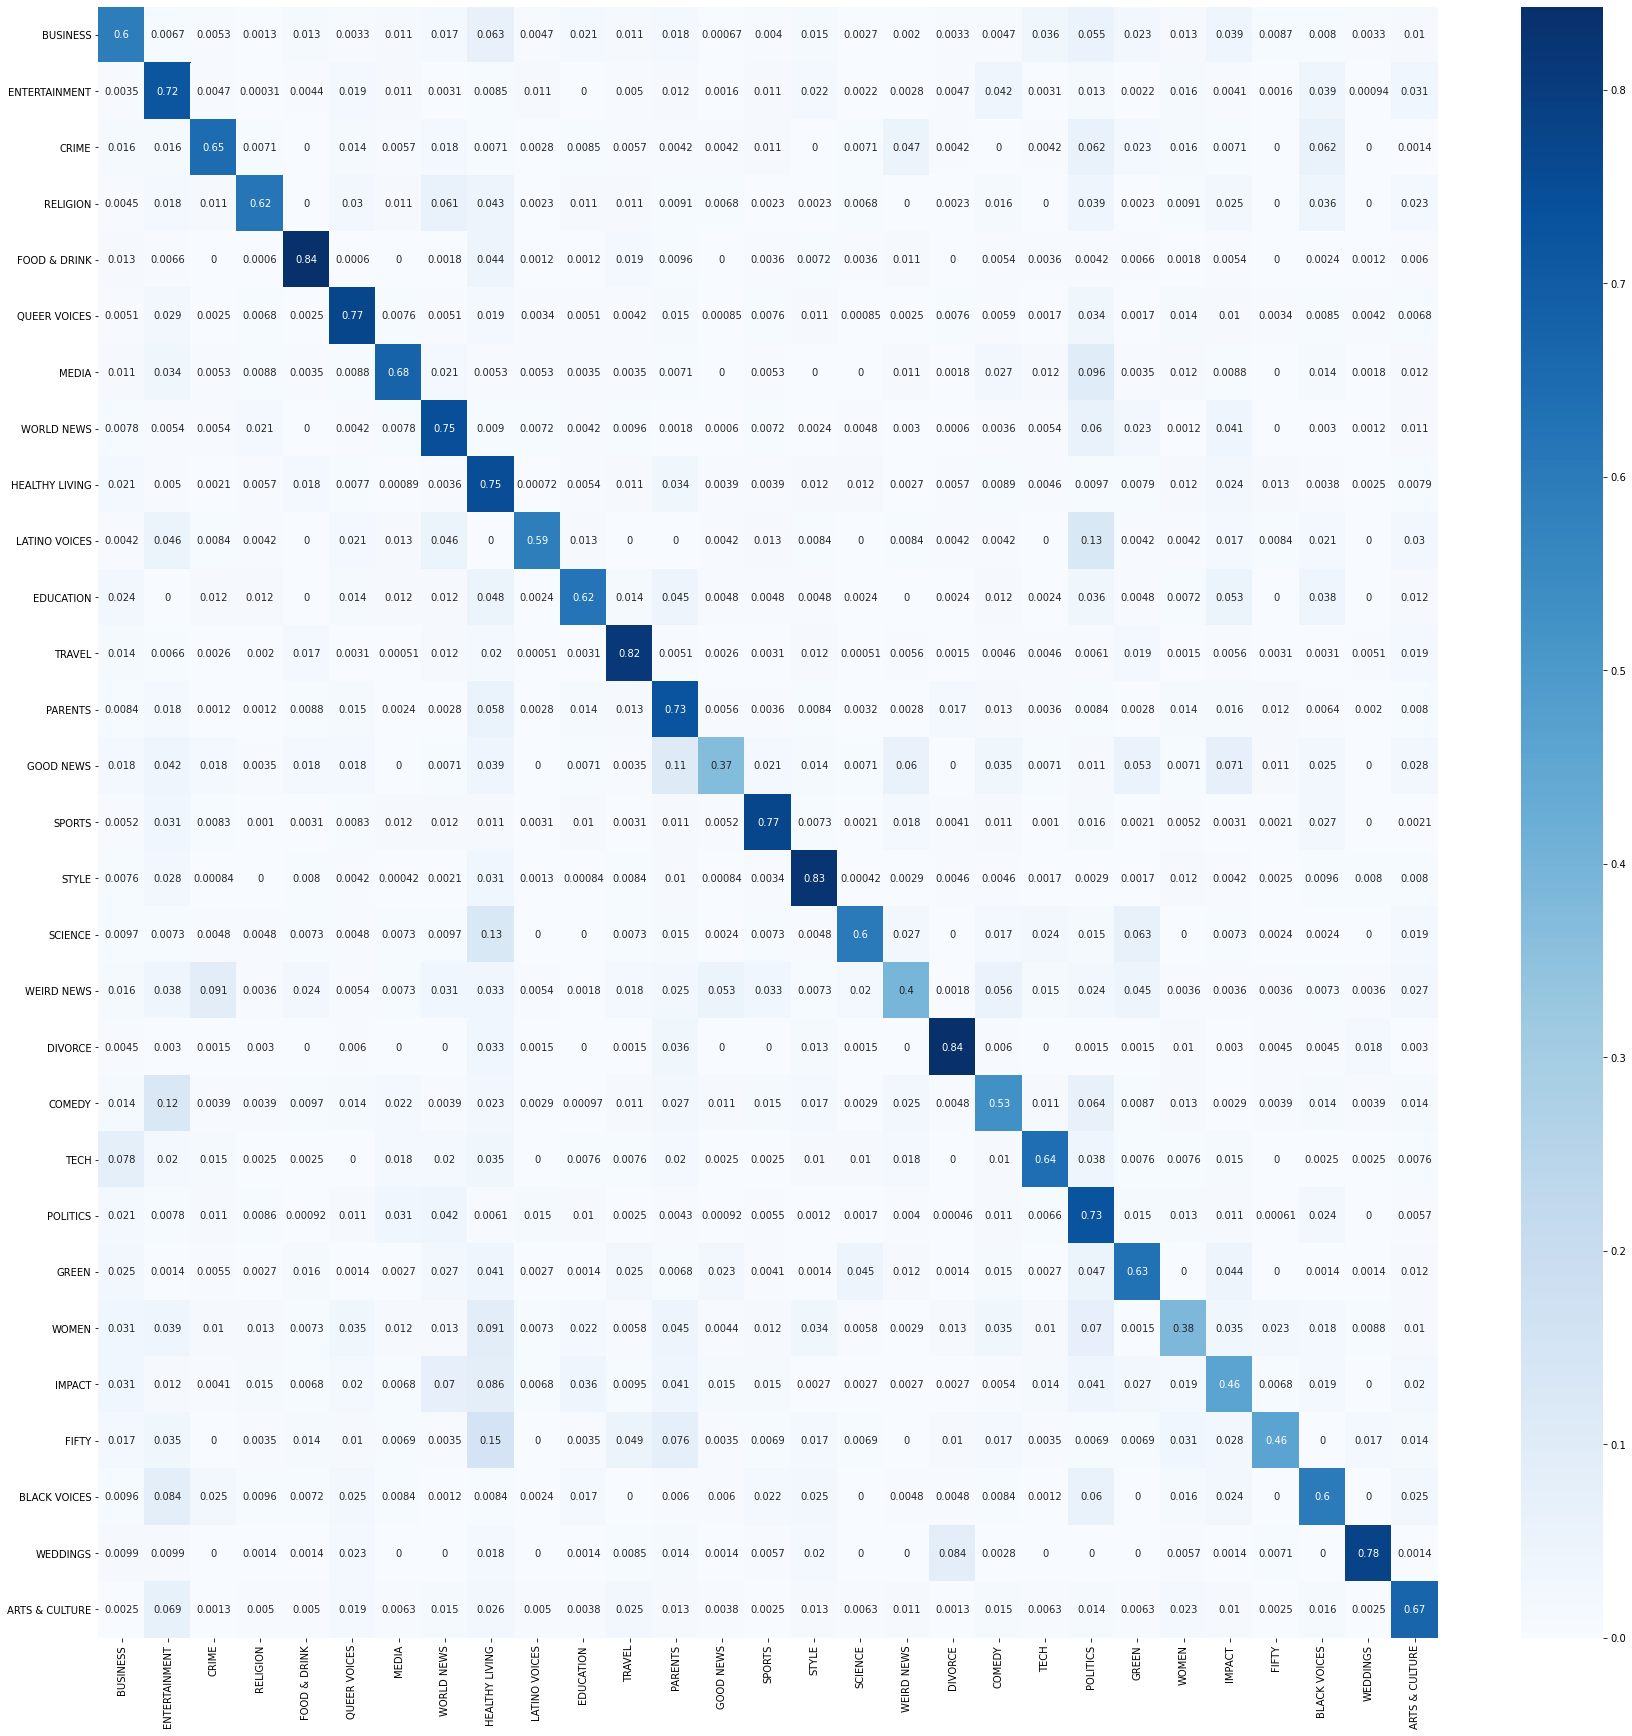

In [22]:
c_matrix = confusion_matrix(y_true, y_pred, labels=label_values, normalize = "true")

import pandas as pd
import seaborn as sns
from pylab import savefig

df_cm = pd.DataFrame(c_matrix, index = label_list,columns = label_list)
plt.rcParams['figure.figsize'] = (30,30)
matrix = sns.heatmap(df_cm, annot=True, cmap='Blues')


In [49]:
all_texts = list_of_sentences
all_labels = number_labels

all_encodings = tokenizer(all_texts, return_tensors='pt', truncation=True, padding=True)


class classHierDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: (val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

full_dataset = classHierDataset(all_encodings, all_labels)
full_dataset_loader = DataLoader(full_dataset, batch_size=16, shuffle=True)


In [50]:
pre_outputs_states = []
all_labels = []

model.eval()

for idx, batch in enumerate(full_dataset_loader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    outputs, feat_for_tsne = model(input_ids, attention_mask=attention_mask)
    pre_classified = feat_for_tsne.cpu().detach().numpy()
    
    #for tsne predictions 
    for item in pre_classified:
        pre_outputs_states.append(item)
        
    # ground truth labels
    for item in labels:
        all_labels.append(item)

In [51]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components = 2, perplexity = 40, n_jobs = -1, random_state = 0).fit_transform(pre_outputs_states)
print(X_embedded.shape)

(198123, 2)


In [52]:
from matplotlib.colors import ListedColormap
gen = np.random.default_rng(6)
rgb = gen.uniform(size=(29, 3))
gen.shuffle(rgb)
a = np.ones((29,1))
rgba = np.concatenate([rgb, a], 1)
cmap = ListedColormap(rgba)

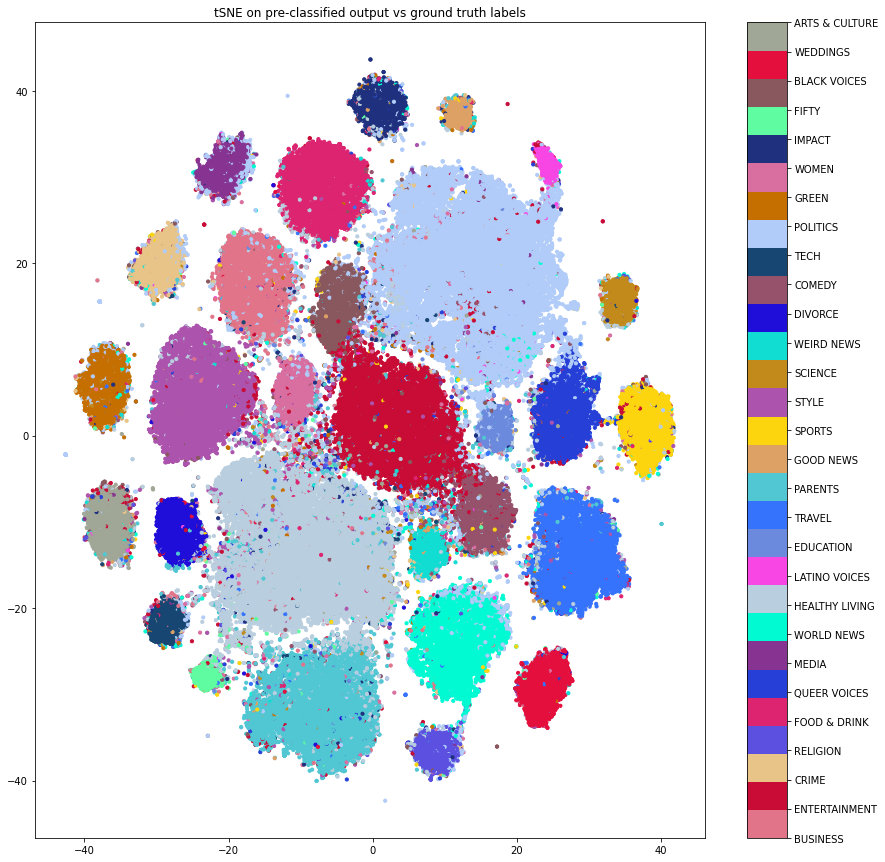

In [53]:
path = os.getcwd()

'''folder = "newBERT_tSNE_figs"
FILE = "clustered_tSNE.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)'''


fig = plt.figure(figsize=(15,15))
#cmap = plt.get_cmap('Set3', 29)
out = plt.scatter(X_embedded[:,0],X_embedded[:,1], 10, c = all_labels, cmap=cmap)
cbar = plt.colorbar(out, ticks = np.arange(29))
cbar.set_ticklabels(list(index_class_map_dict1.keys()))
plt.title("tSNE on pre-classified output vs ground truth labels")
#file_name = path_save

#plt.savefig(file_name)
plt.show()



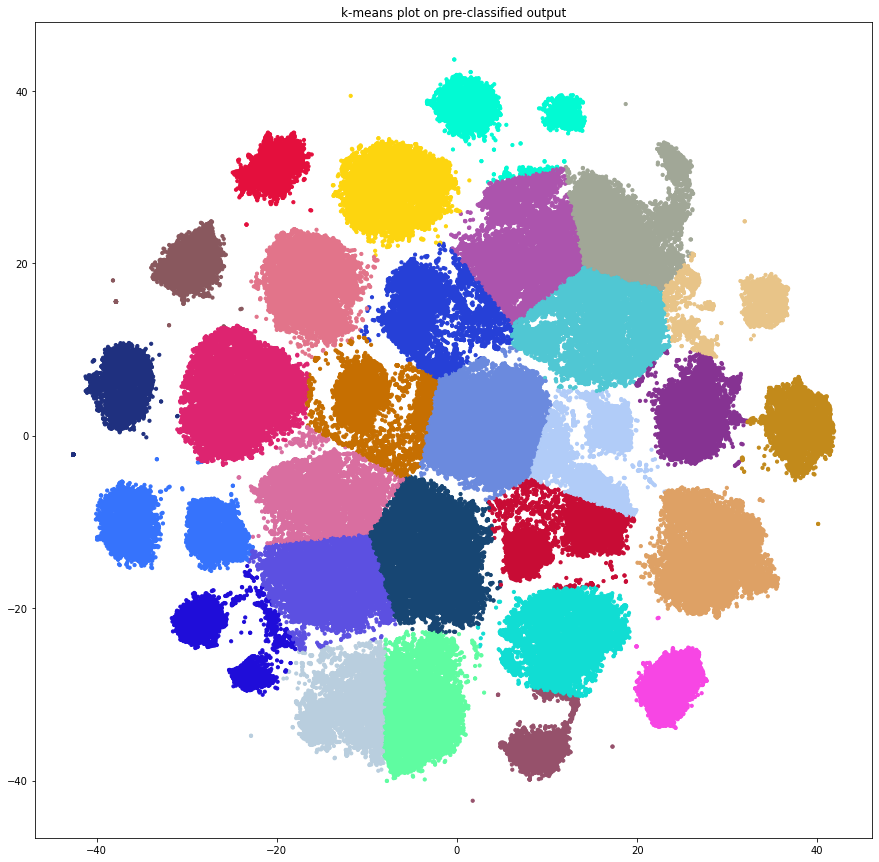

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(29, random_state=0)
c_labels = kmeans.fit(X_embedded).predict(X_embedded)

'''folder = "newBERT_tSNE_figs"
FILE = "clustered_kMeans.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)'''

fig = plt.figure(figsize=(15,15))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], 10, c=c_labels, cmap=cmap)
plt.title("k-means plot on pre-classified output")
#file_name = path_save

#plt.savefig(file_name)
plt.show()


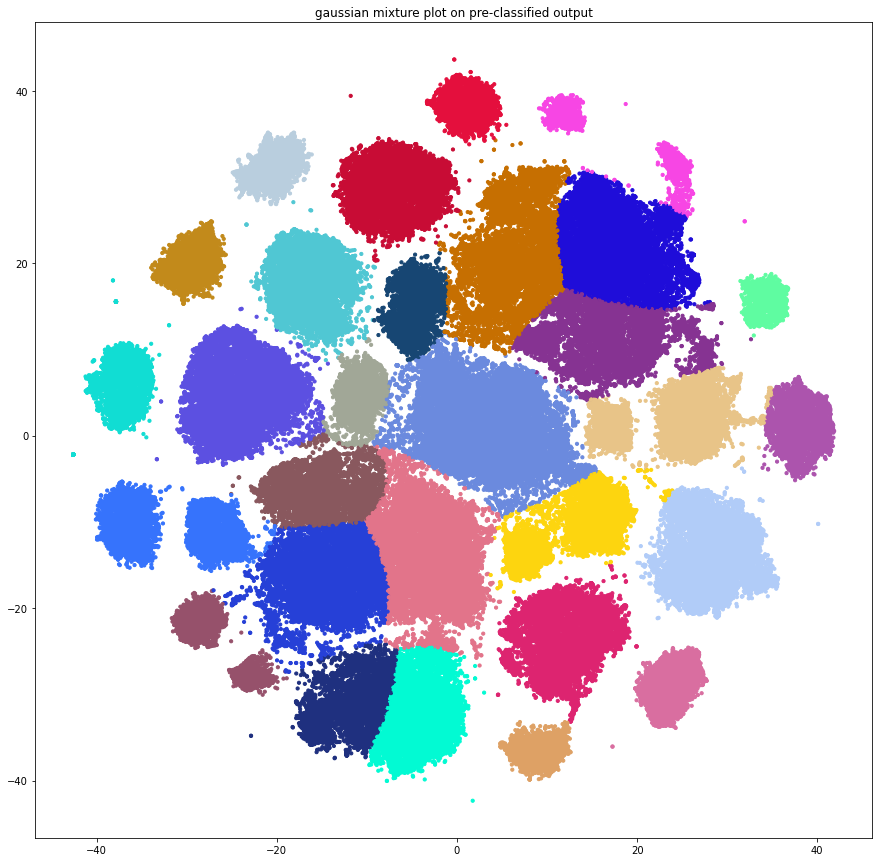

In [55]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=29, random_state=0).fit(X_embedded)
g_labels = gmm.predict(X_embedded)

'''folder = "newBERT_tSNE_figs"
FILE = "clustered_Gaussian.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)'''

fig = plt.figure(figsize=(15,15))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], 10, c=g_labels, cmap=cmap)
plt.title("gaussian mixture plot on pre-classified output")

#file_name = path_save

#plt.savefig(file_name)
plt.show()


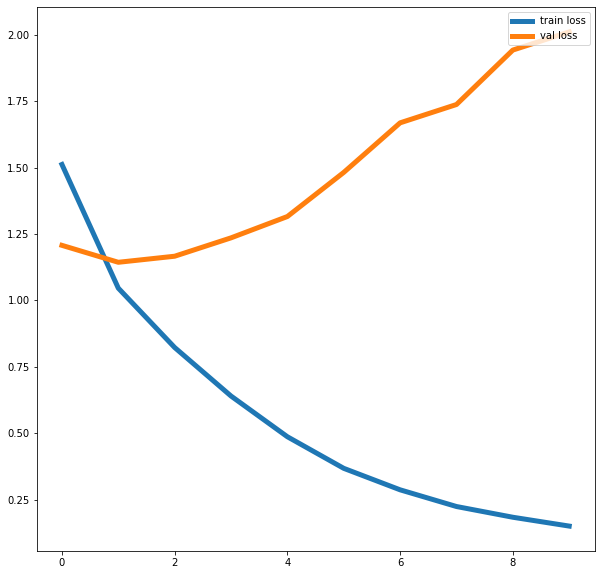

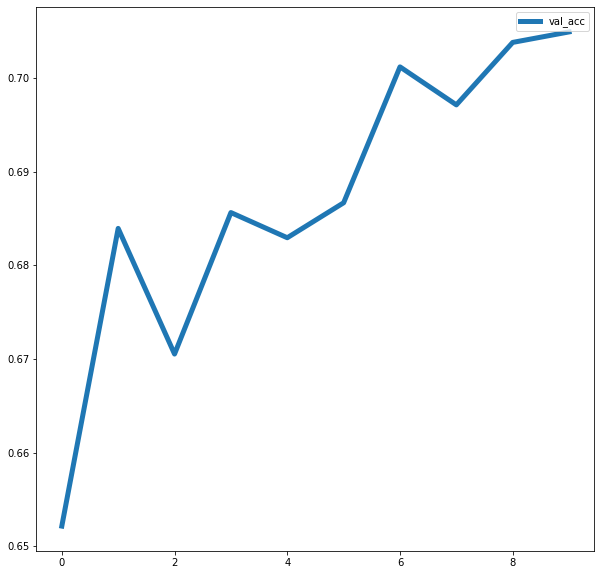

In [117]:
"""import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np

epochs =[]

for i in range(10):
    epochs.append(i)

plt.figure(figsize=(10,10))
plt.plot(epochs, train_losses, linewidth=5)
plt.plot(epochs, val_losses, linewidth=5)
plt.legend(['train loss', 'val loss'], loc = 'upper right')

path = os.getcwd()
folder = "figs"
FILE = "loss-bert.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

plt.savefig(path_save)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(epochs, val_acc, linewidth =5)
plt.legend(['val_acc'], loc = 'upper right')

path = os.getcwd()
folder = "figs"
FILE = "acc-bert.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

plt.savefig(path_save)
plt.show()

path = os.getcwd()
folder = "figs"
FILE = "confusion_matrix_unweighted.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

figure = matrix.get_figure()    
figure.savefig(path_save, dpi=500)

f = open("values.txt",'w')
for i in range(len(epochs)):
    
    f.write("train_loss for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_losses[i]) + "\n")
    f.write("train_acc for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_acc[i]) + "\n")
    f.write("val_loss for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_losses[i]) + "\n")
    f.write("val_acc for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_acc[i]) + "\n")
    f.write("F1 macro score for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(f1_score_macro[i]) + "\n")
    f.write("F1 macro raw for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(f1_score_raw[i]) + "\n")
    f.write("\n""\n")
f.close()
    
    

In [119]:
import os
import shutil

path = os.getcwd()

shutil.rmtree("bert_model1")
os.mkdir("bert_model1")

folder = "bert_model1"
FILE = "model1.pth"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss
            }, path_save)